In [1]:
import sys
sys.path.append('..')
import processing
import models
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import torch
import json
import configs.common as cc


In [2]:
loader = processing.DatasetLoader('..\\..\\dataset\\classical piano np')
train_data, test_data = loader.get_dataloaders()

In [4]:
total = torch.tensor([], device='cuda')
for batch_idx, (src, trg) in enumerate(train_data):
    total = torch.concat((total, src.flatten()))

<BarContainer object of 17090 artists>

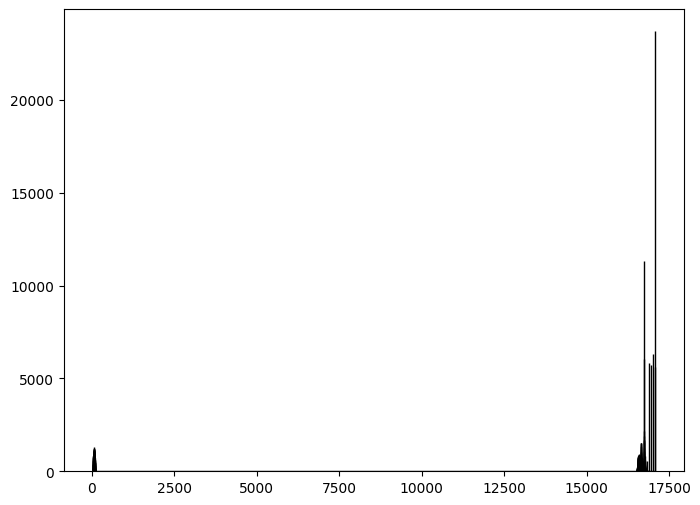

In [5]:
flattened_tensor = total.int()
bins = cc.vocab_size
hist = torch.histc(flattened_tensor, bins=bins, min=0, max=cc.vocab_size)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(range(bins), hist.cpu().int().numpy(), width=1, align='center', color='blue', edgecolor='black')


In [ ]:
print(hist[357] / len(flattened_tensor) * 100)


tensor(11.9597, device='cuda:0')


In [5]:
total[:100]

tensor([274.,  72., 271., 357., 474.,  96., 227., 274., 492.,  53., 487.,  65.,
        256., 271., 474., 106., 227., 278., 378., 492.,  53., 274., 474.,  98.,
        357., 487.,  65., 217., 278.,  72., 274.,  65., 256., 271., 360., 474.,
        103., 227., 285., 374., 487.,  65., 217., 274., 378.,  84., 281., 357.,
         77.,  72., 271., 474.,  98., 227., 274., 487.,  67., 256., 271., 360.,
        474., 104., 227., 278., 374., 487.,  65., 217., 274., 378.,  72., 271.,
        357., 492.,  53., 227., 474.,  98., 274., 487.,  65., 256., 267., 360.,
         60., 228., 274., 357.,  53., 216., 474., 106., 227., 374., 487.,  60.,
        228., 378.,  53., 211.], device='cuda:0')